In [66]:
from IPython.core.display import HTML
HTML("<style>" + open('custom.css').read() + "</style>")


In [1]:
# Cell A: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")


In [ ]:
# Load the CSV file
file_path = "../data/car_sales_data.csv"   

df = pd.read_csv(file_path)
print("Loaded rows:", len(df))
df.head(8)


Loaded rows: 50000


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204
6,Ford,Mondeo,1.8,Diesel,2010,86686,14350
7,Toyota,Prius,1.4,Hybrid,2015,30663,30297


In [3]:
# Quick info & missing values
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB

Missing values per column:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


In [4]:
#  Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 12


In [5]:
#  Remove duplicate rows
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 49988


In [8]:
#  Check for outliers in numeric columns
numeric_cols = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']
print(df[numeric_cols].describe())


        Engine size  Year of manufacture        Mileage          Price
count  49988.000000         49988.000000   49988.000000   49988.000000
mean       1.773140          2004.209630  112515.561215   13829.112387
std        0.734149             9.646056   71624.341062   16417.812203
min        1.000000          1984.000000     630.000000      76.000000
25%        1.400000          1996.000000   54375.250000    3059.750000
50%        1.600000          2004.000000  101011.500000    7971.000000
75%        2.000000          2012.000000  158617.250000   19028.500000
max        5.000000          2022.000000  453537.000000  168081.000000


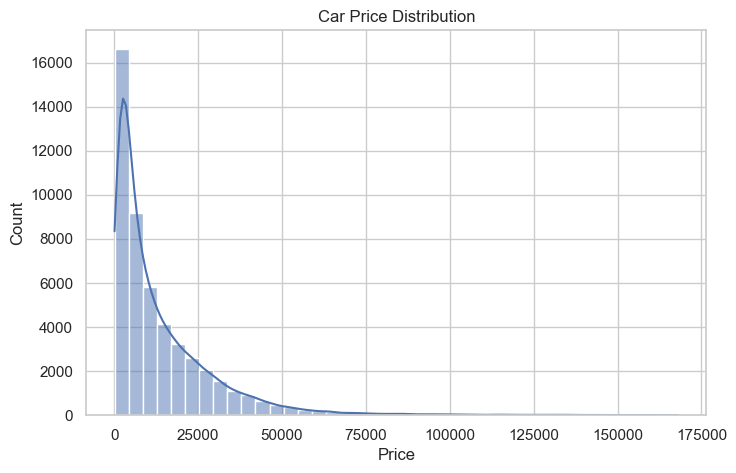

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

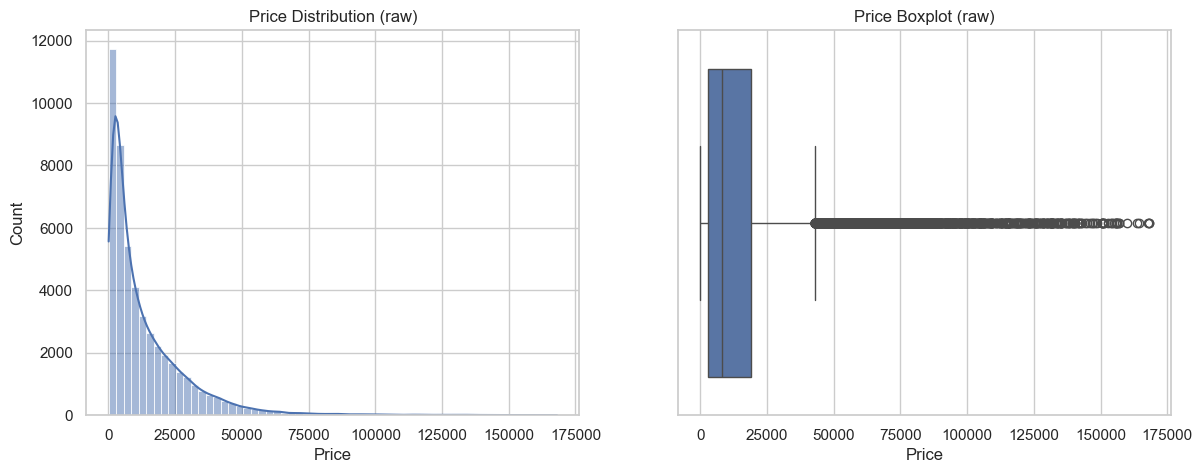

In [10]:
#  Price histogram + boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['Price'], bins=60, kde=True)
plt.title('Price Distribution (raw)')
plt.xlabel('Price')

plt.subplot(1,2,2)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot (raw)')

plt.show()


In [11]:
# Cell: show extreme rows
print("=== 10 cheapest ===")
display(df.nsmallest(10, 'Price'))
print("\n=== 10 most expensive ===")
display(df.nlargest(10, 'Price'))


=== 10 cheapest ===


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
18063,VW,Polo,1.0,Petrol,1987,422895,76
44452,Ford,Fiesta,1.2,Petrol,1984,396901,85
41960,Ford,Fiesta,1.4,Petrol,1984,395085,94
21048,Ford,Fiesta,1.0,Petrol,1985,375388,103
27536,Ford,Fiesta,1.2,Petrol,1986,391920,103
18546,VW,Passat,1.4,Diesel,1985,423053,122
42430,Ford,Mondeo,2.0,Diesel,1984,423108,129
24824,Ford,Fiesta,1.4,Petrol,1985,368573,131
27728,VW,Passat,1.4,Diesel,1984,408775,131
28650,VW,Polo,1.0,Petrol,1986,360154,131



=== 10 most expensive ===


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
22786,BMW,M5,5.0,Petrol,2022,4590,168081
14860,BMW,M5,5.0,Petrol,2022,4683,168001
38438,Porsche,911,3.5,Petrol,2022,2931,167774
49362,Porsche,911,3.5,Petrol,2022,6963,164343
38166,BMW,M5,5.0,Petrol,2022,9797,163608
24675,BMW,M5,5.0,Petrol,2021,1437,159778
48704,BMW,M5,4.4,Petrol,2022,5485,156952
39082,BMW,M5,4.4,Petrol,2022,5710,156771
49500,BMW,M5,4.4,Petrol,2022,6395,156219
43253,BMW,M5,4.4,Petrol,2022,6494,156139


In [12]:
# Cell: percentiles
p1 = df['Price'].quantile(0.01)
p5 = df['Price'].quantile(0.05)
p95 = df['Price'].quantile(0.95)
p99 = df['Price'].quantile(0.99)
p50 = df['Price'].quantile(0.50)
print(f"1%: {p1}, 5%: {p5}, 50%: {p50}, 95%: {p95}, 99%: {p99}")


1%: 429.87, 5%: 911.0, 50%: 7971.0, 95%: 43884.94999999998, 99%: 78869.51999999999


In [13]:
# Cell: IQR outliers count
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Q1, Q3, IQR:", Q1, Q3, IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
outliers_low = df[df['Price'] < lower_bound].shape[0]
outliers_high = df[df['Price'] > upper_bound].shape[0]
print(f"Outliers low: {outliers_low}, Outliers high: {outliers_high}")


Q1, Q3, IQR: 3059.75 19028.5 15968.75
Lower bound: -20893.375
Upper bound: 42981.625
Outliers low: 0, Outliers high: 2649


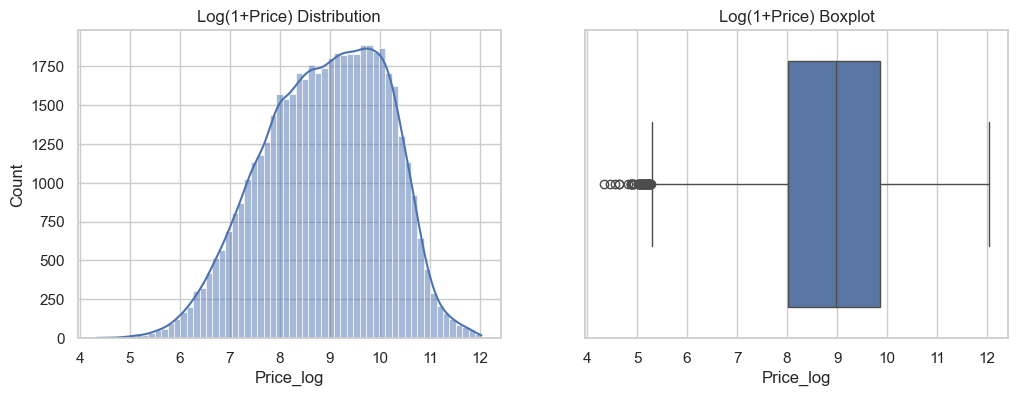

In [14]:
# Cell: log-transform for visualization

df['Price_log'] = np.log1p(df['Price'])  
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Price_log'], bins=60, kde=True)
plt.title('Log(1+Price) Distribution')

plt.subplot(1,2,2)
sns.boxplot(x=df['Price_log'])
plt.title('Log(1+Price) Boxplot')
plt.show()


In [15]:
# Cell: show extreme rows to inspect
print("=== 10 cheapest rows ===")
display(df.nsmallest(10, 'Price'))

print("\n=== 10 most expensive rows ===")
display(df.nlargest(10, 'Price'))


=== 10 cheapest rows ===


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Price_log
18063,VW,Polo,1.0,Petrol,1987,422895,76,4.343805
44452,Ford,Fiesta,1.2,Petrol,1984,396901,85,4.454347
41960,Ford,Fiesta,1.4,Petrol,1984,395085,94,4.553877
21048,Ford,Fiesta,1.0,Petrol,1985,375388,103,4.644391
27536,Ford,Fiesta,1.2,Petrol,1986,391920,103,4.644391
18546,VW,Passat,1.4,Diesel,1985,423053,122,4.812184
42430,Ford,Mondeo,2.0,Diesel,1984,423108,129,4.867534
24824,Ford,Fiesta,1.4,Petrol,1985,368573,131,4.882802
27728,VW,Passat,1.4,Diesel,1984,408775,131,4.882802
28650,VW,Polo,1.0,Petrol,1986,360154,131,4.882802



=== 10 most expensive rows ===


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Price_log
22786,BMW,M5,5.0,Petrol,2022,4590,168081,12.032207
14860,BMW,M5,5.0,Petrol,2022,4683,168001,12.031731
38438,Porsche,911,3.5,Petrol,2022,2931,167774,12.030379
49362,Porsche,911,3.5,Petrol,2022,6963,164343,12.009717
38166,BMW,M5,5.0,Petrol,2022,9797,163608,12.005235
24675,BMW,M5,5.0,Petrol,2021,1437,159778,11.981547
48704,BMW,M5,4.4,Petrol,2022,5485,156952,11.963702
39082,BMW,M5,4.4,Petrol,2022,5710,156771,11.962548
49500,BMW,M5,4.4,Petrol,2022,6395,156219,11.959021
43253,BMW,M5,4.4,Petrol,2022,6494,156139,11.958508


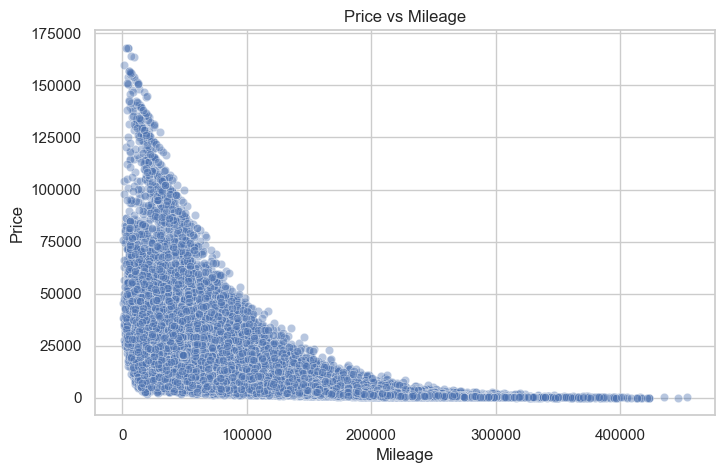

In [17]:
# Cell: Price vs Mileage
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.4)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


Correlation between Mileage and Price: -0.633


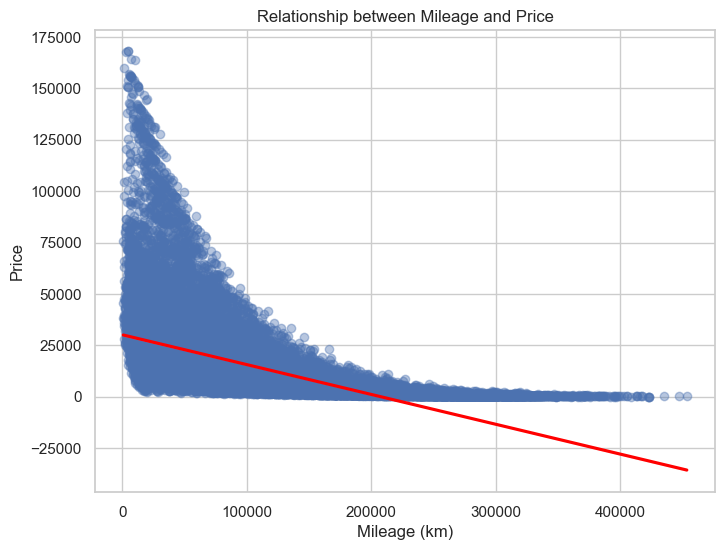

In [ ]:

# correlation and regression plot
corr = df['Mileage'].corr(df['Price'])
print(f"Correlation between Mileage and Price: {corr:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(x='Mileage', y='Price', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.show()


Correlation between Mileage and Log(Price): -0.888


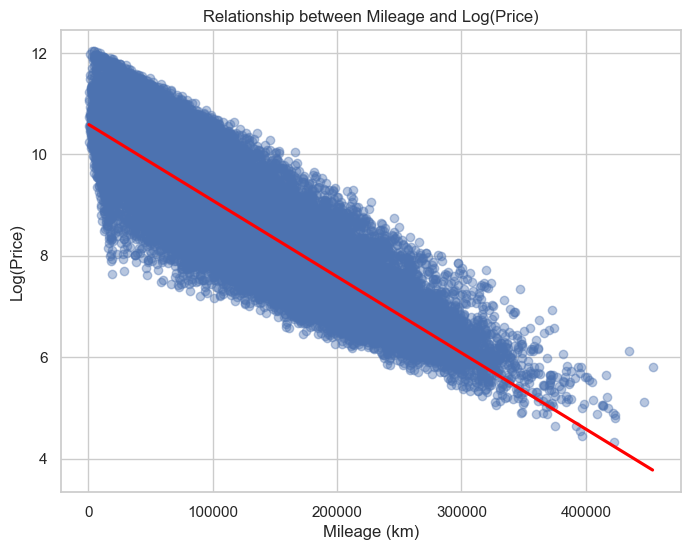

In [19]:
# Cell: log-transform 

df['Price_log'] = np.log(df['Price'])

corr_log = df['Mileage'].corr(df['Price_log'])
print(f"Correlation between Mileage and Log(Price): {corr_log:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(x='Mileage', y='Price_log', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Mileage and Log(Price)')
plt.xlabel('Mileage (km)')
plt.ylabel('Log(Price)')
plt.show()


Correlation between Year of manufacture and Price: 0.714


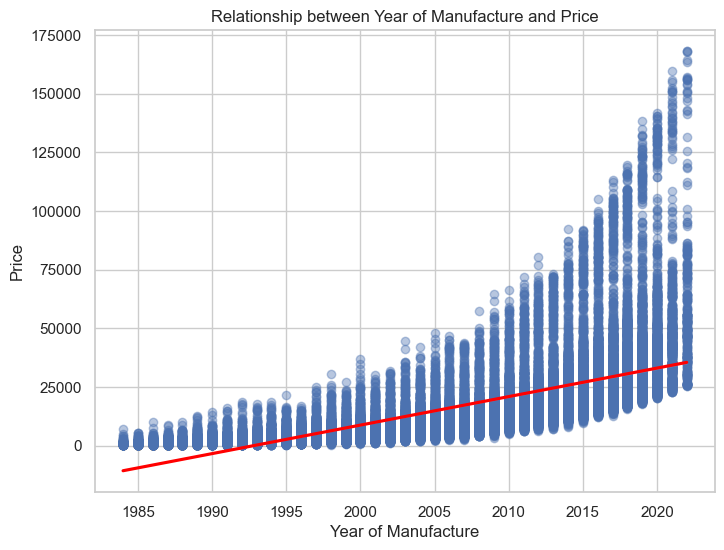

In [20]:
# Cell: Year vs Price
corr_year = df['Year of manufacture'].corr(df['Price'])
print(f"Correlation between Year of manufacture and Price: {corr_year:.3f}")
plt.figure(figsize=(8,6))
sns.regplot(x='Year of manufacture', y='Price', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Year of Manufacture and Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.show()

Correlation between Year of manufacture and Log(Price): 0.895


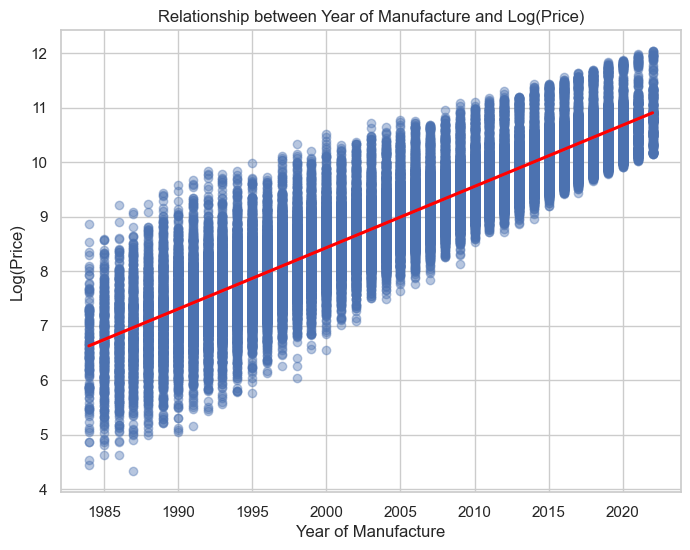

In [21]:
# Calculate the correlation between Year of Manufacture and Log(Price)
corr_year_price_log = df['Year of manufacture'].corr(df['Price_log'])
print(f"Correlation between Year of manufacture and Log(Price): {corr_year_price_log:.3f}")

# Plot the relationship with a regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Year of manufacture', y='Price_log', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Year of Manufacture and Log(Price)')
plt.xlabel('Year of Manufacture')
plt.ylabel('Log(Price)')
plt.show()


Correlation between Engine size and Price: 0.398


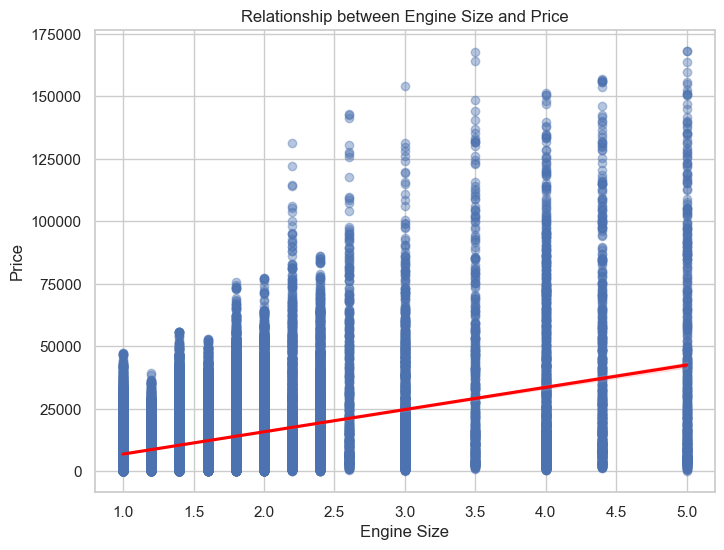

In [28]:
# Calculate the correlation between Engine size and Price
corr_engine_price = df['Engine size'].corr(df['Price'])
print(f"Correlation between Engine size and Price: {corr_engine_price:.3f}")

# Plot the relationship between Engine size and Price
plt.figure(figsize=(8,6))
sns.regplot(x='Engine size', y='Price', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Engine Size and Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()



In [34]:
# Count number of cars per manufacturer
top_brands = df['Manufacturer'].value_counts()

# Display top 10 manufacturers
print(top_brands)


Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64


C:\Users\h\AppData\Local\Temp\ipykernel_12928\644492251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


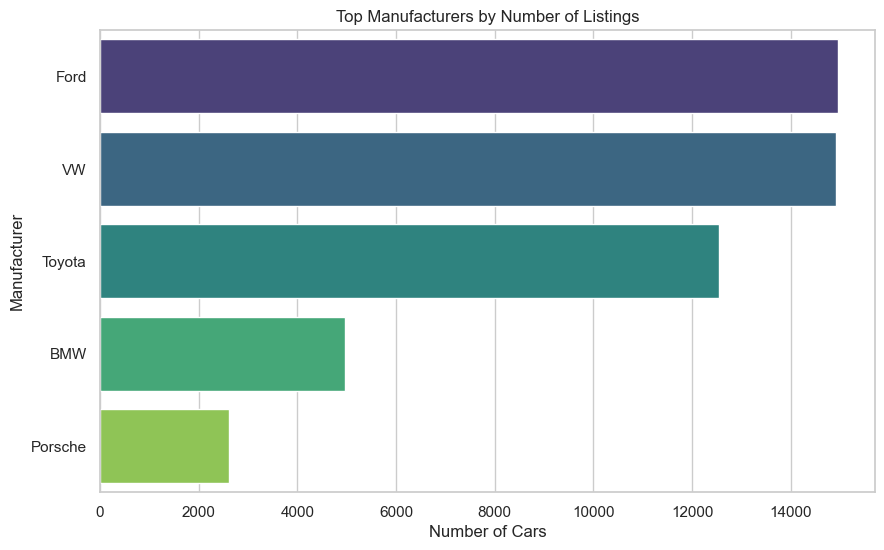

In [ ]:
# Bar plot of top manufacturers
plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top Manufacturers by Number of Listings')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')
plt.show()


Year of manufacture
1984     146
1985     328
1986     437
1987     604
1988     732
1989     920
1990    1109
1991    1275
1992    1326
1993    1503
1994    1487
1995    1616
1996    1504
1997    1542
1998    1520
1999    1554
2000    1535
2001    1504
2002    1541
2003    1469
2004    1578
2005    1548
2006    1566
2007    1561
2008    1515
2009    1508
2010    1534
2011    1572
2012    1583
2013    1576
2014    1499
2015    1487
2016    1587
2017    1501
2018    1646
2019    1242
2020     915
2021     605
2022     313
dtype: int64


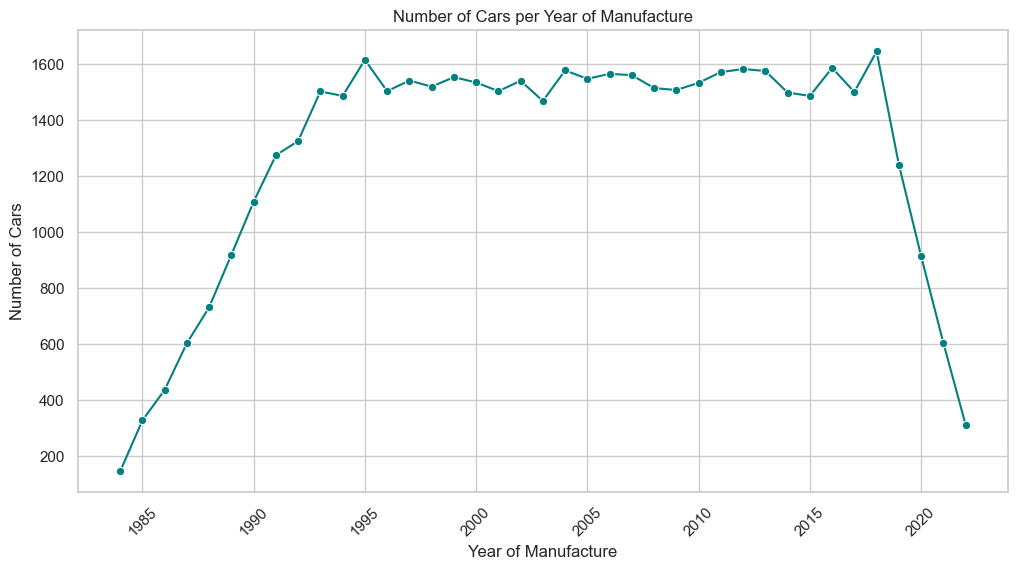

In [45]:
# Count number of cars per year of manufacture
cars_per_year = df.groupby('Year of manufacture').size()

# Display the counts
print(cars_per_year)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(x=cars_per_year.index, y=cars_per_year.values, marker='o', color='teal')
plt.title('Number of Cars per Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()


In [39]:
# Group by year and manufacturer, count number of cars
year_brand_counts = df.groupby(['Year of manufacture', 'Manufacturer']).size().reset_index(name='Count')

# For each year, get the manufacturer with the most cars
top_brand_per_year = year_brand_counts.loc[year_brand_counts.groupby('Year of manufacture')['Count'].idxmax()]

# Display the result
print(top_brand_per_year)


     Year of manufacture Manufacturer  Count
1                   1984         Ford     45
6                   1985         Ford    102
11                  1986         Ford    128
16                  1987         Ford    196
24                  1988           VW    241
26                  1989         Ford    293
31                  1990         Ford    330
39                  1991           VW    400
44                  1992           VW    398
49                  1993           VW    460
51                  1994         Ford    449
59                  1995           VW    506
64                  1996           VW    456
69                  1997           VW    462
71                  1998         Ford    498
79                  1999           VW    493
81                  2000         Ford    481
86                  2001         Ford    465
91                  2002         Ford    479
99                  2003           VW    443
104                 2004           VW    505
106       

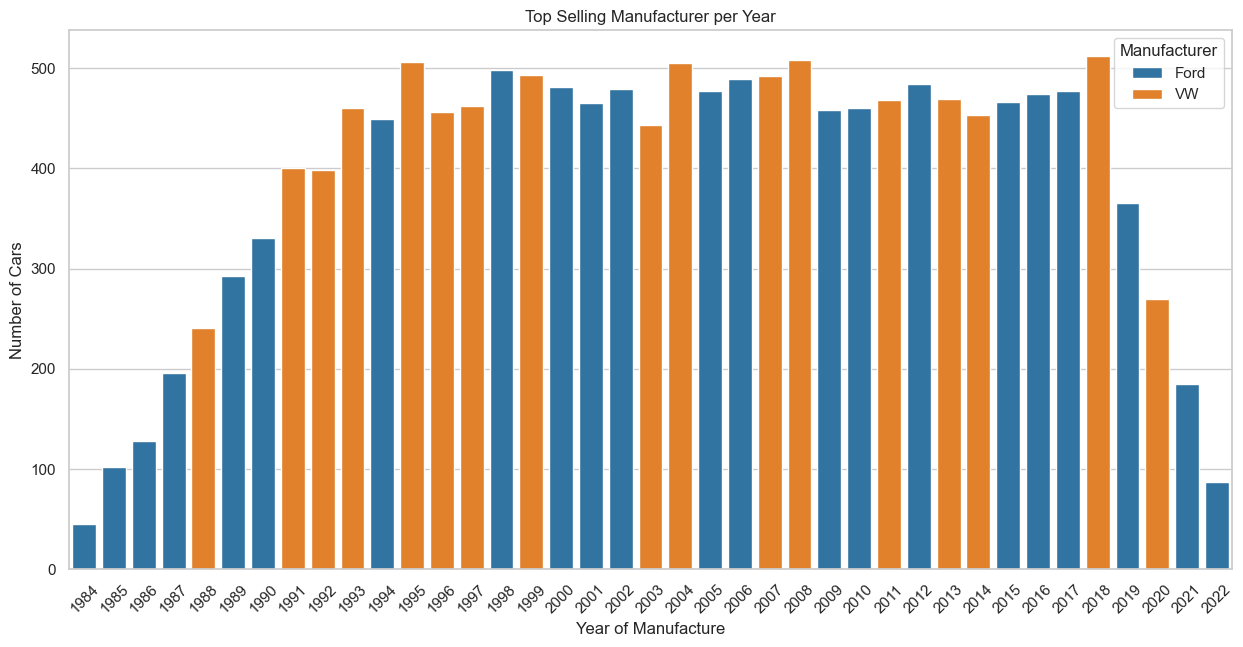

In [44]:
# Plot a bar chart showing top manufacturer per year
plt.figure(figsize=(15,7))
sns.barplot(
    x='Year of manufacture', 
    y='Count', 
    hue='Manufacturer', 
    data=top_brand_per_year,
    dodge=False, # keep one bar per year
    palette='tab10'
)
plt.title('Top Selling Manufacturer per Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.legend(title='Manufacturer')
plt.show()


In [46]:
# Count of cars per Fuel Type
fuel_counts = df['Fuel type'].value_counts()
print("Number of cars per Fuel Type:")
print(fuel_counts)


Number of cars per Fuel Type:
Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64


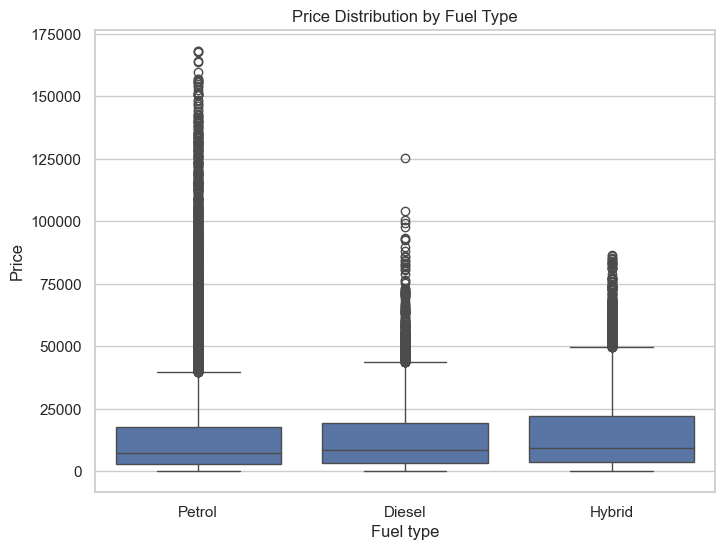

In [47]:
# Boxplot for Price by Fuel Type
plt.figure(figsize=(8,6))
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

In [48]:
# Average Price and Mileage per Fuel Type
fuel_stats = df.groupby('Fuel type')[['Price', 'Mileage']].agg(['mean', 'median']).round(2)
print("\nAverage Price and Mileage per Fuel Type:")
print(fuel_stats)



Average Price and Mileage per Fuel Type:
              Price            Mileage          
               mean  median       mean    median
Fuel type                                       
Diesel     13145.74  8347.0  112682.31  100640.0
Hybrid     14949.29  9357.0  111622.11   99606.0
Petrol     13690.53  7266.0  112823.03  101795.0


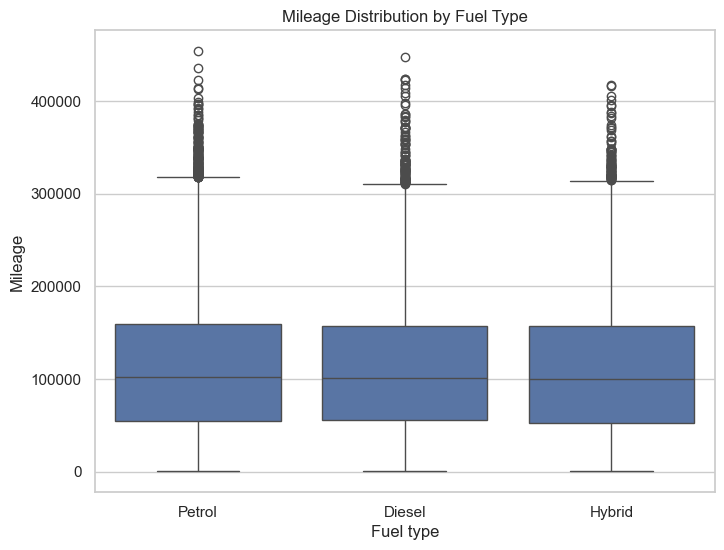

In [49]:
# Boxplot for Mileage by Fuel Type
plt.figure(figsize=(8,6))
sns.boxplot(x='Fuel type', y='Mileage', data=df)
plt.title('Mileage Distribution by Fuel Type')
plt.show()


In [50]:
# Count number of cars per model for each manufacturer
top_models = df.groupby(['Manufacturer', 'Model']).size().reset_index(name='Count')

# Sort by manufacturer and count descending
top_models = top_models.sort_values(['Manufacturer', 'Count'], ascending=[True, False])

# Display top model per manufacturer
top_models_per_brand = top_models.groupby('Manufacturer').first().reset_index()
print(top_models_per_brand)


  Manufacturer   Model  Count
0          BMW      Z4   1687
1         Ford  Mondeo   5057
2      Porsche     911    872
3       Toyota    RAV4   4292
4           VW    Golf   5049


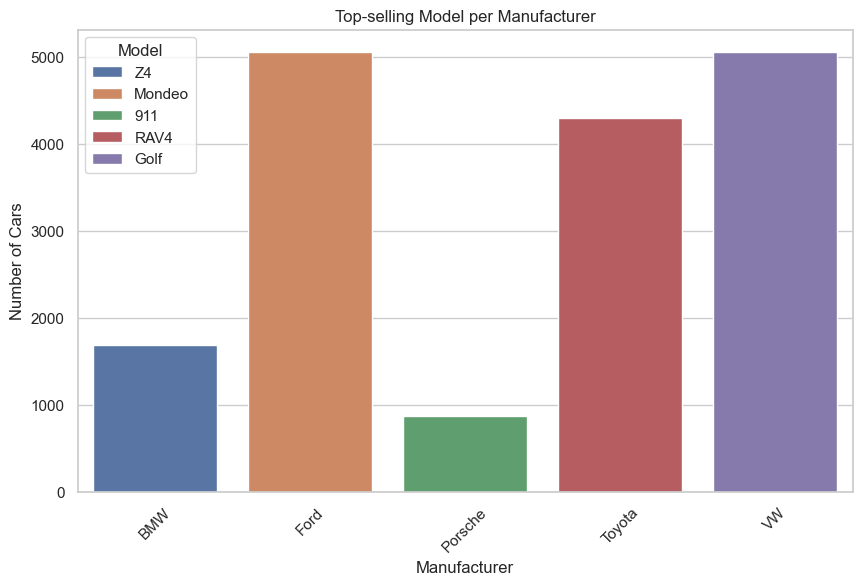

In [51]:
# Bar plot of top model per manufacturer
plt.figure(figsize=(10,6))
sns.barplot(
    x='Manufacturer', 
    y='Count', 
    hue='Model', 
    data=top_models_per_brand, 
    dodge=False
)
plt.title('Top-selling Model per Manufacturer')
plt.ylabel('Number of Cars')
plt.xlabel('Manufacturer')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

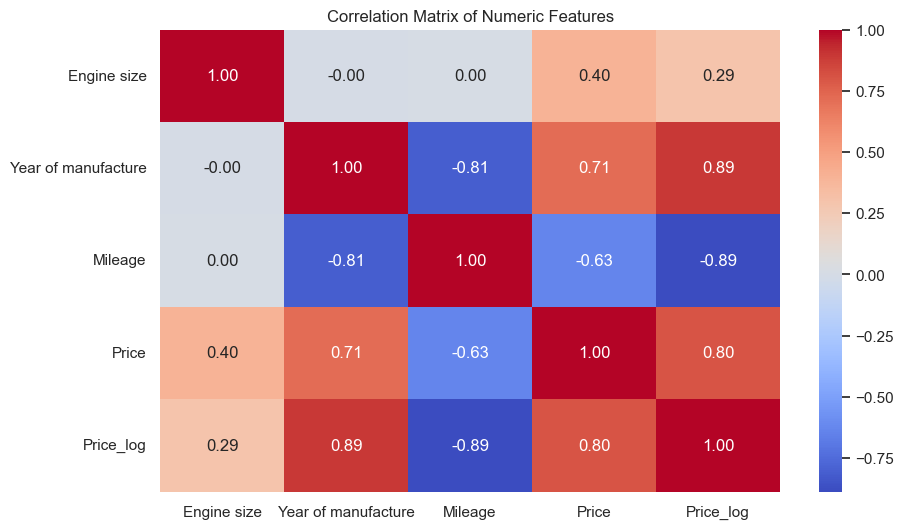

In [53]:
# Select numeric columns
numeric_cols = ['Engine size', 'Year of manufacture', 'Mileage', 'Price', 'Price_log']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [54]:
#Feature engineering ideas:
# - Create age of car feature: current year - year of manufacture
from datetime import datetime
current_year = datetime.now().year
df['Car age'] = current_year - df['Year of manufacture']
df[['Year of manufacture', 'Car age']].head()


,Year of manufacture,Car age
0,2002,23
1,2016,9
2,2014,11
3,1988,37
4,2006,19


In [ ]:
#create mileage categories: low,medium, high
bins = [0, 50000, 150000, 500000]
labels = ['low', 'medium', 'high']
df['Mileage category'] = pd.cut(df['Mileage'], bins=bins, labels=labels)
df[['Mileage', 'Mileage category']].head()

,Mileage,Mileage category
0,127300,medium
1,57850,medium
2,39190,low
3,210814,high
4,127869,medium


In [61]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Convert all newly created dummy columns to int
dummy_cols = df_encoded.columns.difference(df.columns)
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

# Check the new dataframe
print(df_encoded.head())


   Engine size  Year of manufacture  Mileage  Price  Price_log  Car age  \
0          1.0                 2002   127300   3074   8.030735       23   
1          4.0                 2016    57850  49704  10.813841        9   
2          1.6                 2014    39190  24072  10.088805       11   
3          1.8                 1988   210814   1705   7.441320       37   
4          1.0                 2006   127869   4101   8.318986       19   

  Mileage category  Manufacturer_Ford  Manufacturer_Porsche  \
0           medium                  1                     0   
1           medium                  0                     1   
2              low                  1                     0   
3             high                  0                     0   
4           medium                  0                     0   

   Manufacturer_Toyota  ...  Model_Mondeo  Model_Passat  Model_Polo  \
0                    0  ...             0             0           0   
1                    0  ... 

In [65]:
# Save the processed dataframe to a CSV file
df_encoded.to_csv("df_encoded.csv", index=False)


In [67]:
import pandas as pd
df = pd.read_csv("df_encoded.csv")
print(df.columns)


Index(['Engine size', 'Year of manufacture', 'Mileage', 'Price', 'Price_log',
       'Car age', 'Mileage category', 'Manufacturer_Ford',
       'Manufacturer_Porsche', 'Manufacturer_Toyota', 'Manufacturer_VW',
       'Model_911', 'Model_Cayenne', 'Model_Fiesta', 'Model_Focus',
       'Model_Golf', 'Model_M5', 'Model_Mondeo', 'Model_Passat', 'Model_Polo',
       'Model_Prius', 'Model_RAV4', 'Model_X3', 'Model_Yaris', 'Model_Z4',
       'Fuel type_Hybrid', 'Fuel type_Petrol'],
      dtype='object')
